In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import modules for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#Read csv to pandas dataframe
train_x = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_x = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
#train data 
train_x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#test data
test_x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Save columns "Id" in test data and "SalePrice" in train data in Pandas series and drop them
train_y = train_x['SalePrice']
test_id = test_x['Id']
train_x = train_x.drop(['Id', 'SalePrice'], axis=1)
test_x = test_x.drop('Id', axis=1)

In [6]:
#We see a lot of gaps in data:
train_x.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#Let's delete columns with more than quarter (25%) of the null data. 
#We delete 5 columns: Alley, FireplaceQu, PoolQC, Fence, MiscFeature.
for col in train_x.columns:
    if (train_x[col].isna()).sum() > (train_x.shape[0]//4):
        train_x.drop([col], axis = 1, inplace = True)
        test_x.drop([col], axis = 1, inplace = True)

In [8]:
#Get info about type of columns and number of unique values
for col in train_x.columns:
    print(col, '--- type: ', type(train_x[col][0]), ', number of unique: ', train_x[col].nunique())

MSSubClass --- type:  <class 'numpy.int64'> , number of unique:  15
MSZoning --- type:  <class 'str'> , number of unique:  5
LotFrontage --- type:  <class 'numpy.float64'> , number of unique:  110
LotArea --- type:  <class 'numpy.int64'> , number of unique:  1073
Street --- type:  <class 'str'> , number of unique:  2
LotShape --- type:  <class 'str'> , number of unique:  4
LandContour --- type:  <class 'str'> , number of unique:  4
Utilities --- type:  <class 'str'> , number of unique:  2
LotConfig --- type:  <class 'str'> , number of unique:  5
LandSlope --- type:  <class 'str'> , number of unique:  3
Neighborhood --- type:  <class 'str'> , number of unique:  25
Condition1 --- type:  <class 'str'> , number of unique:  9
Condition2 --- type:  <class 'str'> , number of unique:  8
BldgType --- type:  <class 'str'> , number of unique:  5
HouseStyle --- type:  <class 'str'> , number of unique:  8
OverallQual --- type:  <class 'numpy.int64'> , number of unique:  10
OverallCond --- type:  <c

In [9]:
#Let's define categorical columns as columns with type 'string' or columns with number of unique values less 25. 
#Other columns will be numerical data
cat_cols = [col for col in train_x.columns if type(train_x[col][0]) == str or train_x[col].nunique()<25]
num_cols = [col for col in train_x.columns if col not in cat_cols]

In [10]:
#Categorical data
print(cat_cols)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [11]:
#Numerical data
print(num_cols)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


In [12]:
train_x.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [13]:
#Transform data. We fill null values in categorical columns with most frequent values in these columns.
#And fill null data in numerical columns with median.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])
preproc = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])
train_x = pd.DataFrame(preproc.fit_transform(train_x))
train_x.columns = cat_cols+num_cols
test_x = pd.DataFrame(preproc.fit_transform(test_x))
test_x.columns = cat_cols+num_cols

In [14]:
train_x.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,5.0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,...,-0.459303,-0.793434,1.161852,0.370333,1.017598,0.351000,-0.752176,0.216503,-0.359325,-0.270208
1,0.0,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,...,0.466465,0.257140,-0.795163,-0.482512,-0.107927,-0.060731,1.626195,-0.704483,-0.359325,-0.270208
2,5.0,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,...,-0.313369,-0.627826,1.189351,0.515013,0.934226,0.631726,-0.752176,-0.070361,-0.359325,-0.270208
3,6.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,...,-0.687324,-0.521734,0.937276,0.383659,0.809167,0.790804,-0.752176,-0.176048,4.092524,-0.270208
4,5.0,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,...,0.199680,-0.045611,1.617877,1.299326,0.892540,1.698485,0.780197,0.563760,-0.359325,-0.270208


In [15]:
test_x.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,0.0,2.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,1.0,...,-0.370716,-0.654561,-0.775254,-1.215588,-0.653107,1.185921,0.366678,-0.701628,-0.360738,1.818960
1,0.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0,12.0,2.0,...,0.639230,0.433298,-0.775254,-0.323539,-0.769806,-0.741235,2.347867,-0.178826,-0.360738,-0.301543
2,5.0,3.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,...,-0.266784,-0.574165,0.891944,0.294508,0.747276,0.042537,0.930495,-0.207871,-0.360738,-0.301543
3,5.0,3.0,1.0,0.0,3.0,0.0,4.0,0.0,8.0,2.0,...,-0.271303,-0.579190,0.837243,0.243004,0.786176,-0.012788,2.089451,-0.178826,-0.360738,-0.301543
4,11.0,3.0,1.0,0.0,1.0,0.0,4.0,0.0,22.0,2.0,...,0.528520,0.310192,-0.775254,-0.424487,0.552779,0.153187,-0.729632,0.489198,-0.360738,2.243060


In [16]:
#Make dictionary with names of columns and the correlation coefficient between the column and train_y (target column "SalePrice")
col_with_corr = {}
for col in train_x.columns:
    col_with_corr[col] = train_x[col].corr(train_y)
    print(col, ': ', col_with_corr[col])

MSSubClass :  -0.05475145665191354
MSZoning :  -0.16687220265320646
Street :  0.04103553550004948
LotShape :  -0.25557987048712216
LandContour :  0.015453241660960342
Utilities :  -0.014314296147248806
LotConfig :  -0.06739602315941741
LandSlope :  0.05115224817946654
Neighborhood :  0.21085146582230319
Condition1 :  0.09115491154092832
Condition2 :  0.007512734036333064
BldgType :  -0.08559060818352927
HouseStyle :  0.18016262334399102
OverallQual :  0.7909816005838044
OverallCond :  -0.07785589404867803
RoofStyle :  0.22240529240713833
RoofMatl :  0.1323831119277881
Exterior1st :  0.10355101119090569
Exterior2nd :  0.10376553702965832
MasVnrType :  0.018215771261658742
ExterQual :  -0.6368836943991134
ExterCond :  0.11730265704316555
Foundation :  0.38247899119010176
BsmtQual :  -0.618025353865324
BsmtCond :  0.05256333809943163
BsmtExposure :  -0.2954067382413884
BsmtFinType1 :  -0.09210633107556575
BsmtFinType2 :  0.03323475094224368
Heating :  -0.09881207599757648
HeatingQC :  -0.

<AxesSubplot:ylabel='Count'>

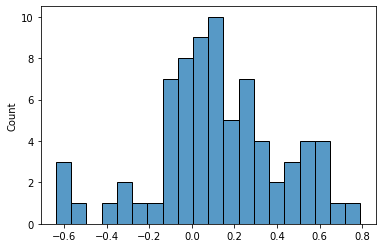

In [17]:
#In the graph below we see that many columns have a small correlation with target column (less than 0.2 in absolute value)
sns.histplot(list(col_with_corr.values()), bins=20)

In [18]:
#Let's delete columns with correlation < 0.2
for col, corr in col_with_corr.items():
    if abs(corr)<0.2: 
        train_x.drop([col], axis=1, inplace=True)
        test_x.drop([col], axis=1, inplace=True)

In [19]:
train_x.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotShape       1460 non-null   float64
 1   Neighborhood   1460 non-null   float64
 2   OverallQual    1460 non-null   float64
 3   RoofStyle      1460 non-null   float64
 4   ExterQual      1460 non-null   float64
 5   Foundation     1460 non-null   float64
 6   BsmtQual       1460 non-null   float64
 7   BsmtExposure   1460 non-null   float64
 8   HeatingQC      1460 non-null   float64
 9   CentralAir     1460 non-null   float64
 10  Electrical     1460 non-null   float64
 11  BsmtFullBath   1460 non-null   float64
 12  FullBath       1460 non-null   float64
 13  HalfBath       1460 non-null   float64
 14  KitchenQual    1460 non-null   float64
 15  TotRmsAbvGrd   1460 non-null   float64
 16  Fireplaces     1460 non-null   float64
 17  GarageType     1460 non-null   float64
 18  GarageFi

In [20]:
#Now we are ready to predict data
#Import CatBoostRegressor
from catboost import CatBoostRegressor

In [21]:
#I've run this code on my local machine and have gotten next values of parameters with GridSearchCV:
cat = CatBoostRegressor(random_state=0,  verbose=False, n_estimators=5000,
                        reg_lambda=0.02, max_depth=3, learning_rate=0.03)
cat.fit(train_x, train_y)
y_pred_cat = cat.predict(test_x)
print(round(cat.score(train_x, train_y)*100,2))

99.48


In [22]:
#Export results to files
result_data = pd.DataFrame()
result_data['Id']=test_id
result_data['SalePrice'] = y_pred_cat
result_data.to_csv("submission.csv", index=False)